# Credit card fraud detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from imblearn.over_sampling import SMOTE  


In [2]:
df = pd.read_csv('archive/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Class distributions

The dataset is very unbalanced (492 frauds out of 284,807 transactions).
Need to use appropriate metrics such as the AUPRC (Area Under the Precision-Recall Curve) rather than simple precision, which would be misleading (predicting ‘0’ all the time would give very high precision but poor recall).

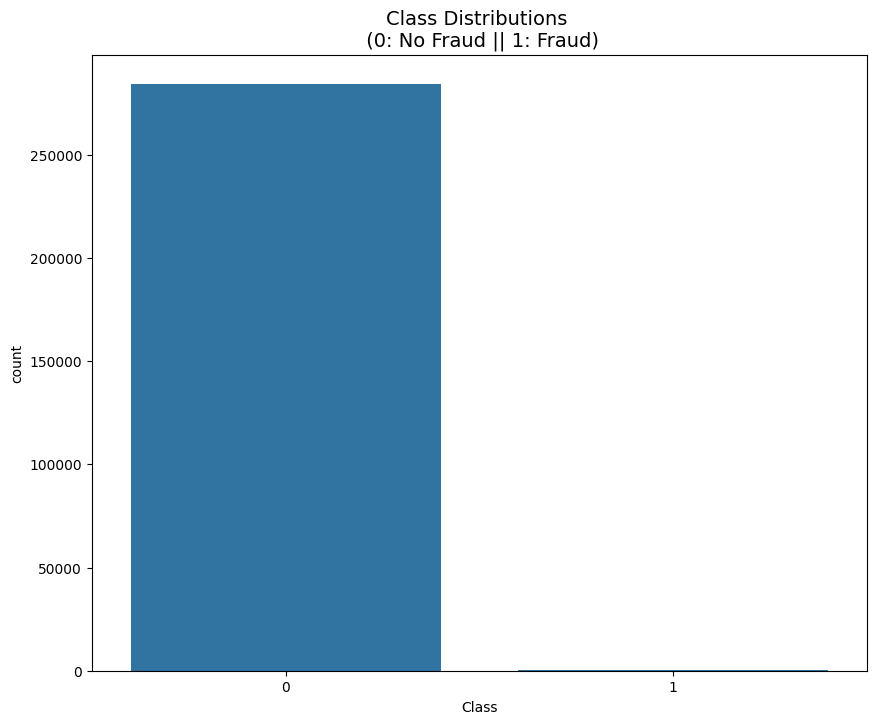

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [5]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

The bar chart illustrates a highly imbalanced dataset, where the majority class (non-fraudulent transactions) significantly outweighs the minority class (fraudulent transactions). This imbalance presents several challenges for model training and evaluation.

Standard classification models **may be biased** toward the majority class, leading to high overall accuracy but poor recall for the minority class.
**Accuracy is not an appropriate metric in this case**, as a model predicting all transactions as non-fraudulent would still achieve high accuracy.
More suitable evaluation metrics include Precision, Recall, F1-score, and ROC-AUC.


## Checking missing data

In [6]:
df.isnull().sum().max()

0

## EDA - Exploratory Data Analysis

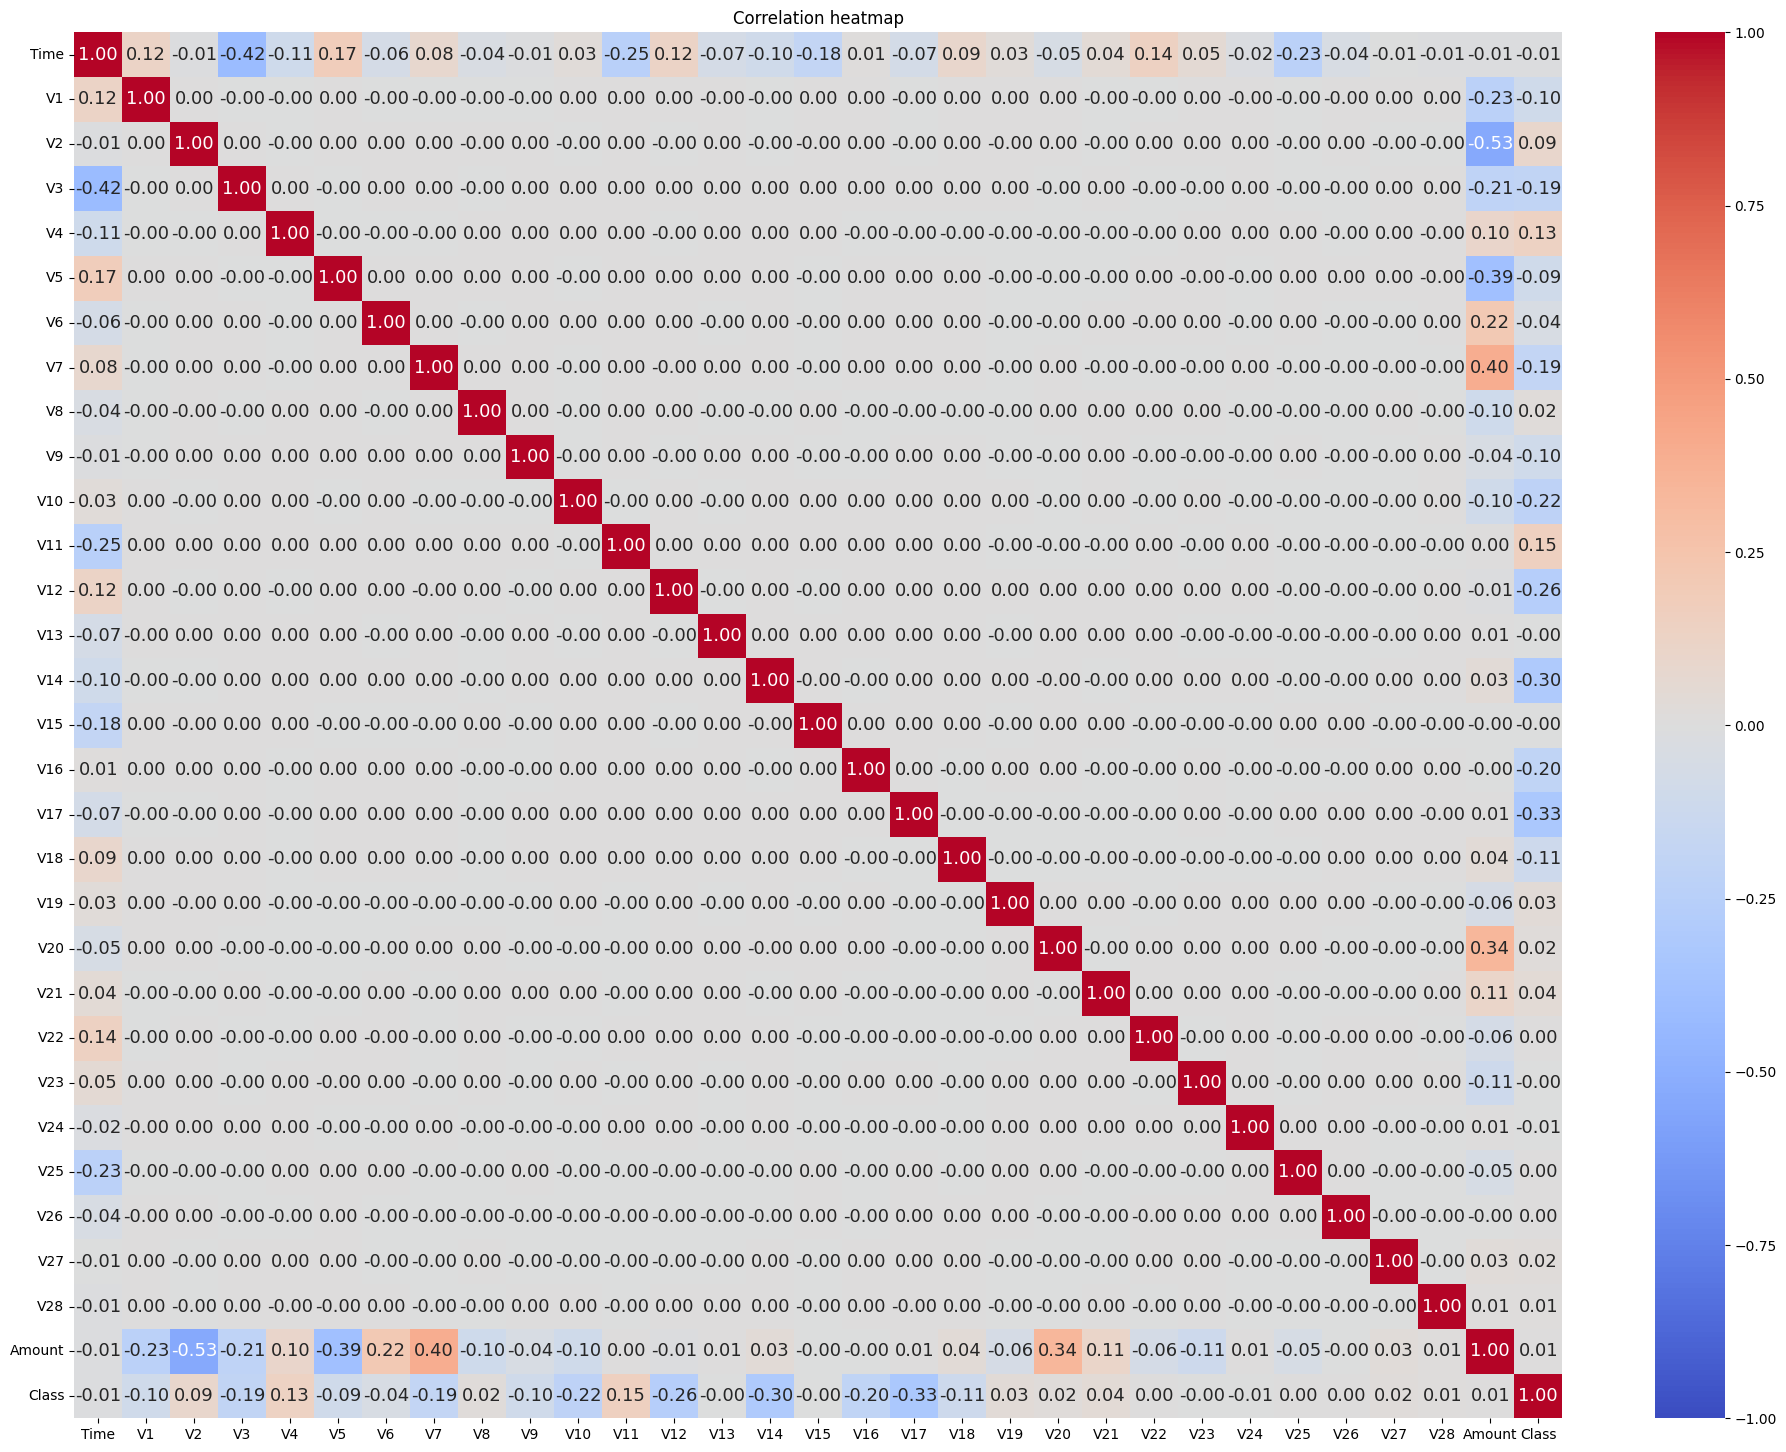

In [7]:
plt.figure(figsize=(24,18))
sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 13},
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation heatmap')
plt.show()

There are only weak correlations

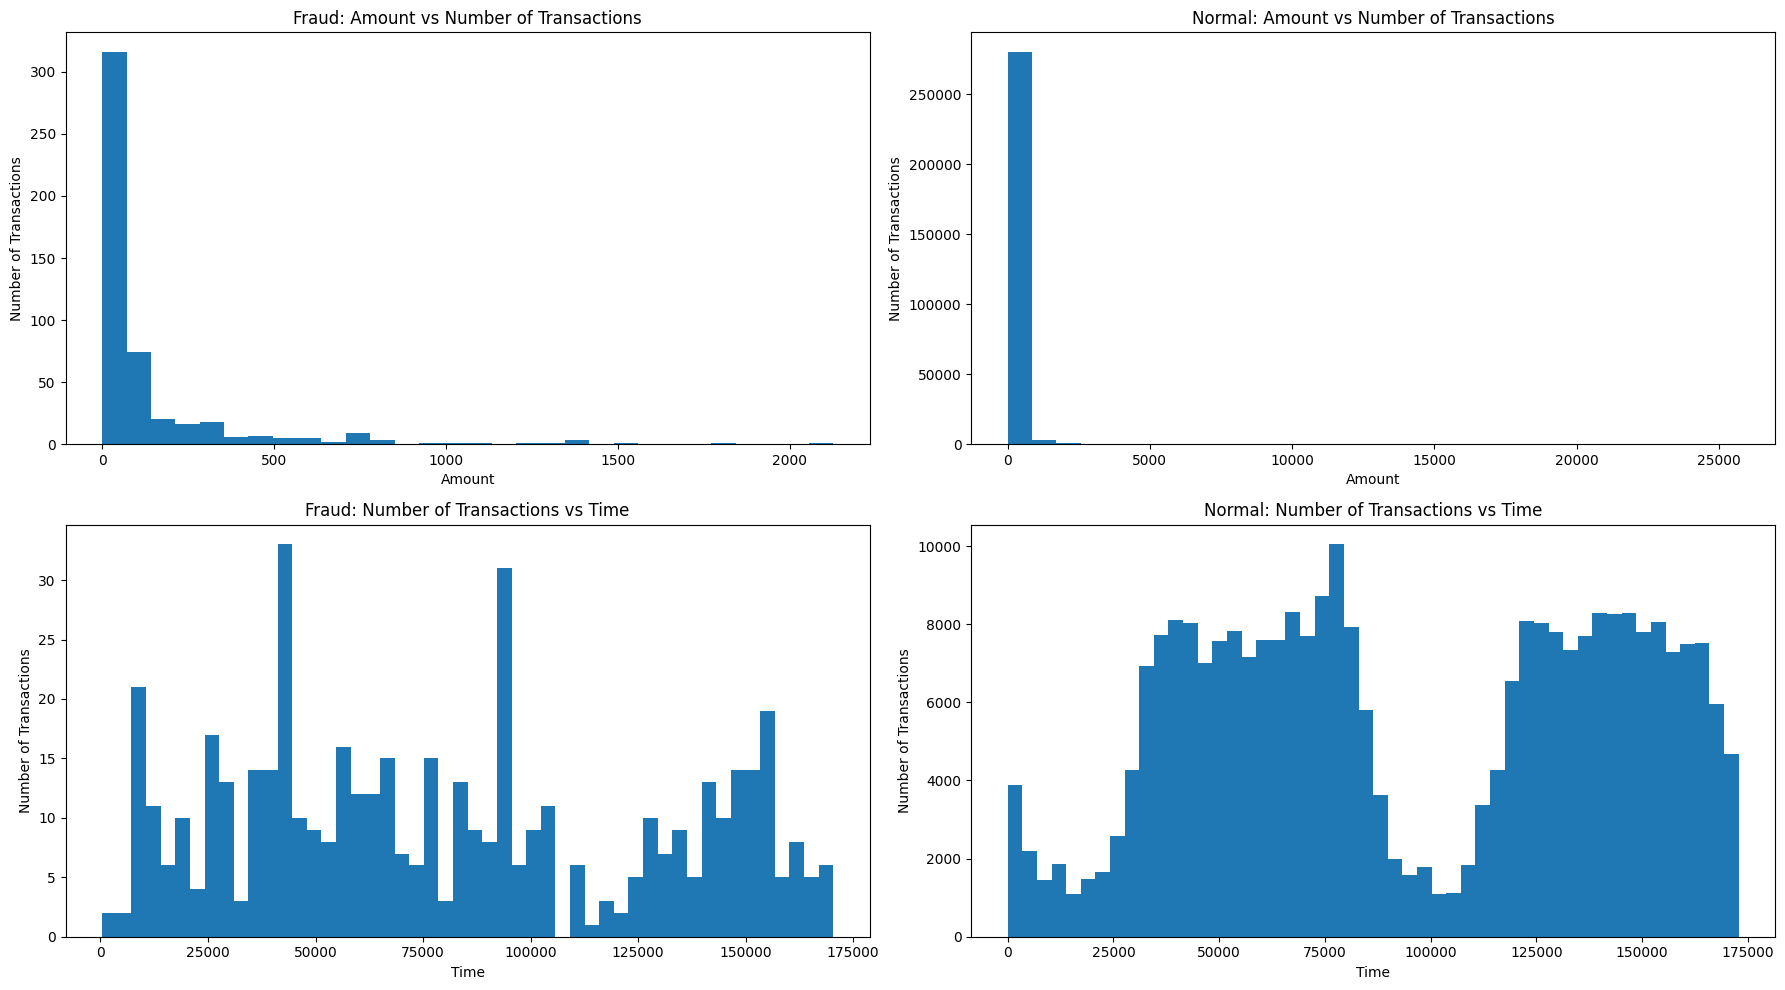

In [3]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

axes[0, 0].hist(fraud['Amount'], bins=30)
axes[0, 0].set_title('Fraud: Amount vs Number of Transactions')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Number of Transactions')

axes[0, 1].hist(normal['Amount'], bins=30)
axes[0, 1].set_title('Normal: Amount vs Number of Transactions')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Number of Transactions')

axes[1, 0].hist(fraud['Time'], bins=50)
axes[1, 0].set_title('Fraud: Number of Transactions vs Time')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Number of Transactions')

axes[1, 1].hist(normal['Time'], bins=50)
axes[1, 1].set_title('Normal: Number of Transactions vs Time')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

Amout histograms :

- The transaction amount distribution for both follows a similar pattern
- Fraudulent transactions exhibit a much steeper decline as the amount increases, whereas normal transactions maintain a slightly broader distribution 
- Fraudsters may operate with smaller amounts, potentially to evade detection
- Large fraudulent transactions are rare, possibly due to stricter security measures in place for high-value transactions

Number of transactions histograms : 

- Normal transactions follow a structured pattern
- Fraudulent transactions appear more scattered and irregular, with intermittent peaks
- Suggests that fraud attempts do not follow standard financial activity pattern

-> Time-based and amount-based anomaly detection strategies will be crucial for improving fraud detection models

C:\Users\arthu\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


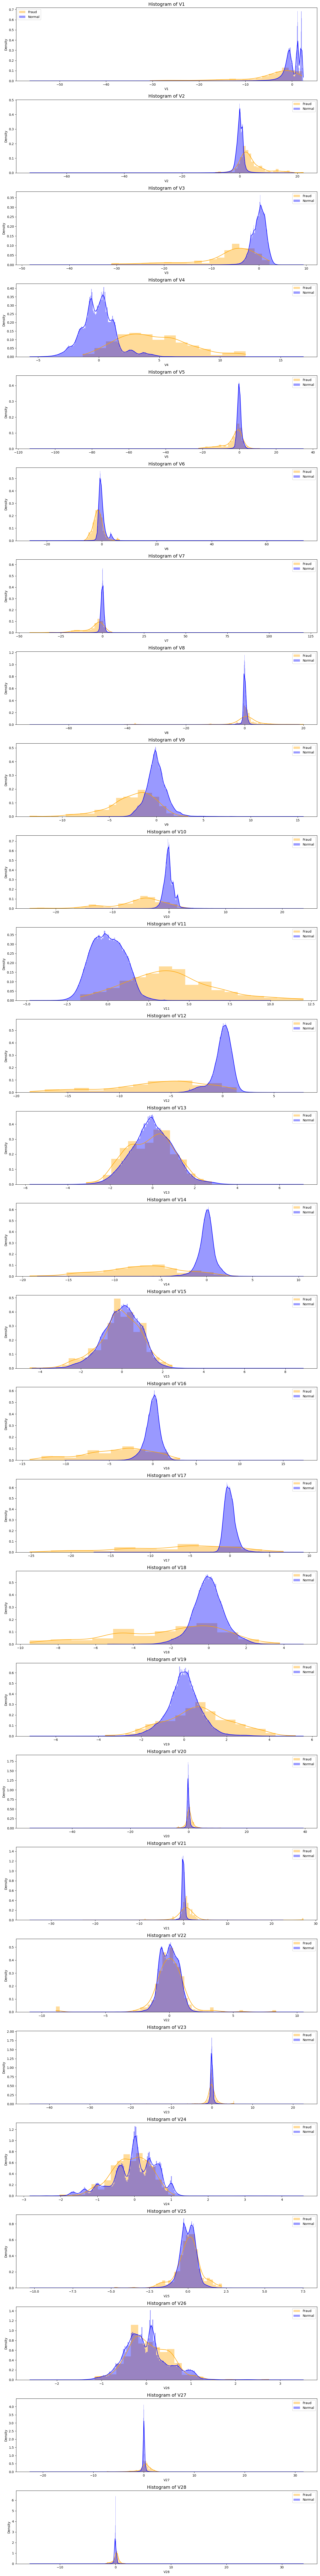

In [9]:
# Filter numerical features
num_features = df.iloc[:, 1:29].columns
num_rows = len(num_features)

fig, axes = plt.subplots(num_rows, 1, figsize=(14, num_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(fraud[col], kde=True, ax=axes[i], color='orange', label='Fraud', stat='density', alpha=0.4, edgecolor=None)
    sns.histplot(normal[col], kde=True, ax=axes[i], color='blue', label='Normal', stat='density', alpha=0.4, edgecolor=None)
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].legend()


plt.tight_layout()
plt.show()

Some features show **strong divergence** between fraudulent and non-fraudulent distributions. These are likely to be highly discriminative in fraud detection models.

## Data Preparation & Feature Engineering

In [10]:
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

In [11]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Managing Class Imbalance

The fraud class is a very small minority (0.172%). I use SMOTE (Synthetic Oversampling of the Minority Class) to fix it.

In [12]:
smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

## Model Selection

Due to the highly unbalanced nature of the credit card fraud detection problem, I have selected models that effectively handle class imbalance and excel at anomaly detection, which is crucial for reliable performance: Tree-based model, SVM and linear model (useful for baseline comparisons and when interpretability is required).

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, make_scorer, precision_score, recall_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
import joblib

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

scoring = {
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}


for name, model in models.items():
    scores = cross_validate(model, X_test, y_test, cv=5, scoring=scoring, return_train_score=False)
    print(name, "No SMOTE")
    print("AUC-ROC:   ", scores['test_roc_auc'])
    print("Precision: ", scores['test_precision'])
    print("Recall:    ", scores['test_recall'])
    print("")

    scores = cross_validate(model, X_test_smote, y_test_smote, cv=5, scoring=scoring, return_train_score=False)
    print(name, "SMOTE")
    print("AUC-ROC:   ", scores['test_roc_auc'])
    print("Precision: ", scores['test_precision'])
    print("Recall:    ", scores['test_recall'])
    print("")

LogisticRegression No SMOTE
AUC-ROC:    [0.99971424 0.93150444 0.92898694 0.99944004 0.95110798]
Precision:  [0.82352941 0.90909091 0.78571429 0.75       0.84615385]
Recall:     [0.7        0.5        0.57894737 0.47368421 0.55      ]

LogisticRegression SMOTE
AUC-ROC:    [0.99050657 0.98920266 0.99031529 0.9920813  0.99106411]
Precision:  [0.97785433 0.9729207  0.97367161 0.97040573 0.97251688]
Recall:     [0.87340659 0.88478452 0.8944591  0.89401935 0.88659341]

SVM No SMOTE
AUC-ROC:    [0.99970984 0.90939066 0.89132618 0.99965755 0.89253429]
Precision:  [0.85714286 1.         1.         1.         0.85714286]
Recall:     [0.6        0.35       0.31578947 0.36842105 0.3       ]

SVM SMOTE
AUC-ROC:    [0.99960516 0.99961759 0.99962938 0.99953067 0.99958286]
Precision:  [0.98856359 0.98991288 0.99136364 0.98863636 0.98866213]
Recall:     [0.94989011 0.94942832 0.9591029  0.95646438 0.95824176]

DecisionTree No SMOTE
AUC-ROC:    [0.87469225 0.84978018 0.84197337 0.94710464 0.87482413]
P

## Model Improvement

Based on the evaluation metrics, XGBoost shows promising performance on several dimensions. In this section, I will try to improve its performance.

In [15]:
# Grid search for XGBoost
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

model = XGBClassifier(n_estimators=100, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_test_smote, y_test_smote)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
# Train
model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train_smote, y_train_smote)
joblib.dump(model, f"XGBoost.pkl")
print(f"Model XGBoost saved")

Model XGBoost saved


Confusion matrix:
[[56819    45]
 [   15    83]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.85      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962

0.9784778289481241


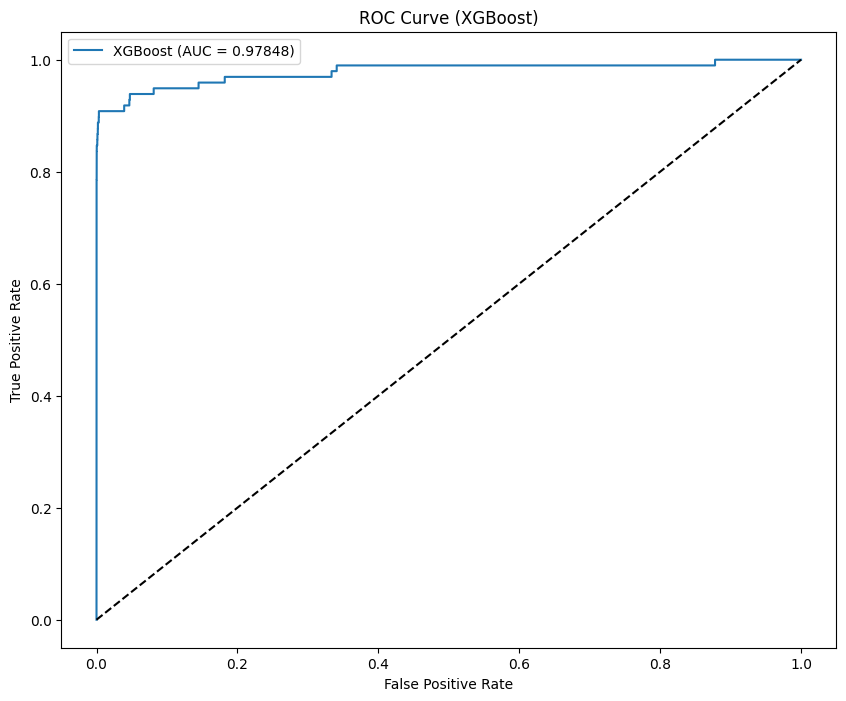

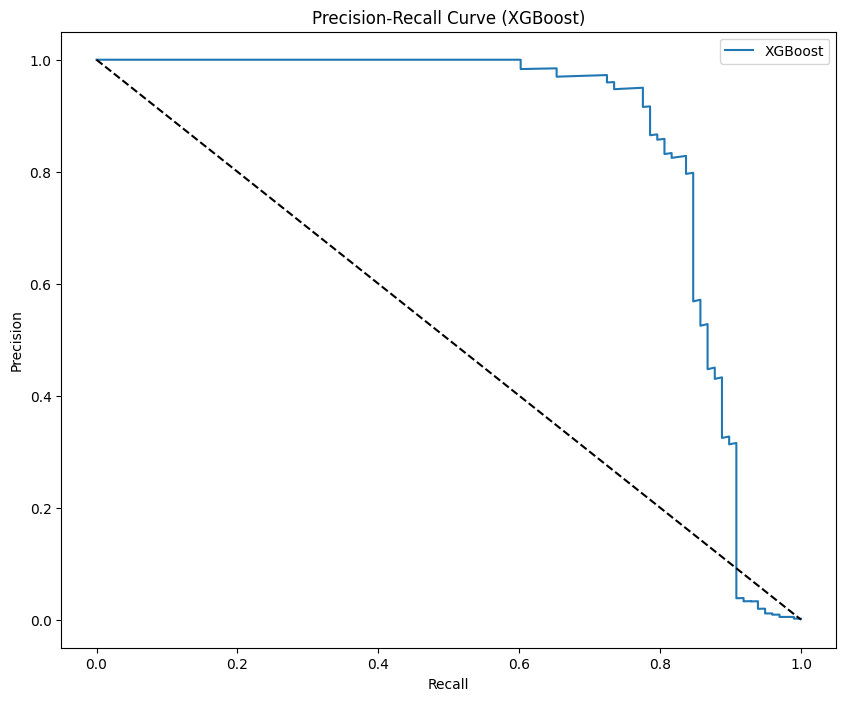

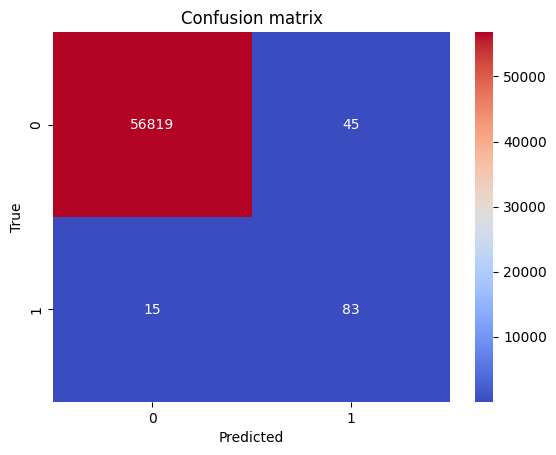

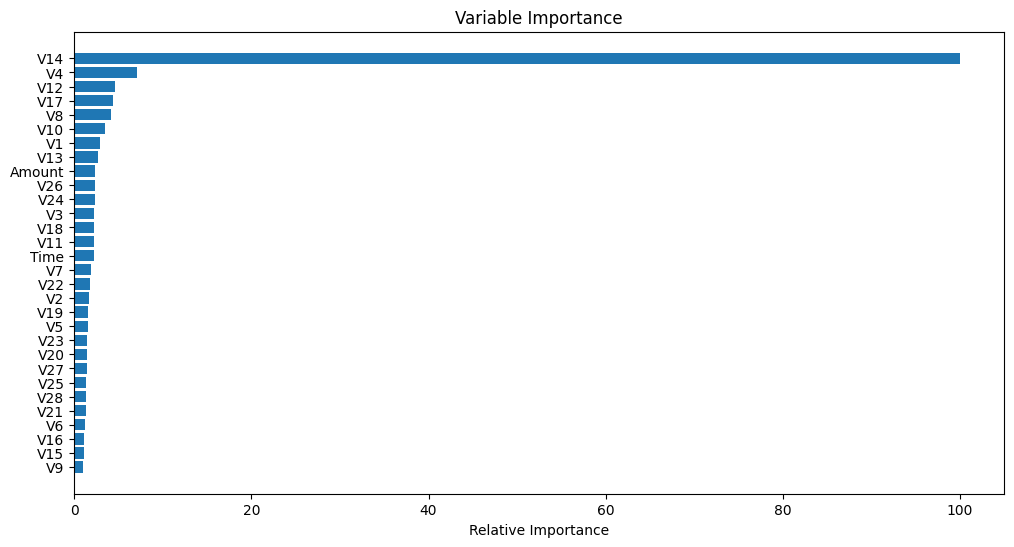

In [17]:
# Load model
model = joblib.load("XGBoost.pkl")

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print(auc_score)


# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc_score:.5f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label=f"XGBoost")
plt.plot([0, 1], [1, 0], 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

# Feature importance
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


According to the classification matrix, my model has a recall of about **0.85** for fraudulent transactions. The model uses almost only V14 feature to detect fraud, a model using other features may be more robust.